# Preprocesamiento de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

## Carga los datos del archivo `data.csv

### Nombre de las 30 características

| Nombre Corto | Característica | Nombre de la Característica |
|--------|--------------|------------------------|
| feat01 | feature01 | mean radius |
| feat02 | feature02 | mean texture |
| feat03 | feature03 | mean perimeter |
| feat04 | feature04 | mean area |
| feat05 | feature05 | mean smoothness |
| feat06 | feature06 | mean compactness |
| feat07 | feature07 | mean concavity |
| feat08 | feature08 | mean concave points |
| feat09 | feature09 | mean symmetry |
| feat10 | feature10 | mean fractal dimension |
| feat11 | feature11 | radius error |
| feat12 | feature12 | texture error |
| feat13 | feature13 | perimeter error |
| feat14 | feature14 | area error |
| feat15 | feature15 | smoothness error |
| feat16 | feature16 | compactness error |
| feat17 | feature17 | concavity error |
| feat18 | feature18 | concave points error |
| feat19 | feature19 | symmetry error |
| feat20 | feature20 | fractal dimension error |
| feat21 | feature21 | worst radius |
| feat22 | feature22 | worst texture |
| feat23 | feature23 | worst perimeter |
| feat24 | feature24 | worst area |
| feat25 | feature25 | worst smoothness |
| feat26 | feature26 | worst compactness |
| feat27 | feature27 | worst concavity |
| feat28 | feature28 | worst concave points |
| feat29 | feature29 | worst symmetry |
| feat30 | feature30 | worst fractal dimension |

In [4]:
# Crear nombres cortos para las características
feature_names = [f'feat{str(i+1).zfill(2)}' for i in range(30)]

# Cargar el dataset desde el archivo CSV
file_path = "../data/data.csv"
df = pd.read_csv(file_path, header=None)

# Separar el ID, diagnóstico y características
X = df.drop([0, 1], axis=1)  # Eliminar columnas ID y diagnóstico
y = df[1].map({'M': 0, 'B': 1})  # Convertir M/B a 0/1

# Asignar nombres cortos a las columnas de características
X.columns = feature_names

# Crear un DataFrame combinado con 'y' como primera columna
df_display = pd.concat([y.rename('diagnosis'), X], axis=1)

# Mostrar los primeros registros en formato tabla
print("\nPrimeros registros del dataset:\n")
print(tabulate(df_display.head(21), headers='keys', tablefmt='rst', showindex=True, floatfmt='.4f'))


Primeros registros del dataset:

====  ===========  ========  ========  ========  =========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  =========  ========  ========  ========  ========  ========  ========
  ..    diagnosis    feat01    feat02    feat03     feat04    feat05    feat06    feat07    feat08    feat09    feat10    feat11    feat12    feat13    feat14    feat15    feat16    feat17    feat18    feat19    feat20    feat21    feat22    feat23     feat24    feat25    feat26    feat27    feat28    feat29    feat30
====  ===========  ========  ========  ========  =========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  ========  =========  ========  ========  ========  ========  ========  ========
   0  

## Mostrar información básica del dataset

In [5]:
print("Dimensiones del dataset:")
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print("\nDistribución de clases:")
print(y.value_counts())

Dimensiones del dataset:
Número de muestras: 569
Número de características: 30

Distribución de clases:
1
1    357
0    212
Name: count, dtype: int64


## Dividir los datos en entrenamiento (80%) y prueba (20%)

In [6]:
np.random.seed(42)  # Para reproducibilidad
indices = np.random.permutation(len(X))
split_point = int(len(X) * 0.8)

## Crear conjuntos de entrenamiento y prueba

In [7]:
X_train = X.iloc[indices[:split_point]]
X_test = X.iloc[indices[split_point:]]
y_train = y.iloc[indices[:split_point]]
y_test = y.iloc[indices[split_point:]]

## Estandarización manual de los datos
### Calculamos media y desviación estándar solo con los datos de entrenamiento

In [8]:
mean_train = X_train.mean()
std_train = X_train.std()

## Aplicamos la estandarización a ambos conjuntos
Estandarización manual de los datos (z-score normalization).
"z-score normalization" o "normalización de puntaje Z", también conocida como estandarización, es una técnica estadística que se utiliza para transformar los datos numéricos de un conjunto de datos.  
Su objetivo principal es ajustar los valores de los datos para que tengan una media de 0 y una desviación estándar de 1.  
Esto se logra mediante la siguiente fórmula:

$$z = \frac{x - μ}{σ}$$

Donde:
- $z$ es el puntaje Z normalizado.
- $x$ es el valor original del dato.
- $μ$ es la media de todos los valores en el conjunto de datos.
- $σ$ es la desviación estándar de todos los valores en el conjunto de datos.

In [9]:
X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train  # Usamos mean_train y std_train del conjunto de entrenamiento

In [10]:
# Comprobamos que los datos son un DataFrame de Pandas
type(X_train_scaled)

pandas.core.frame.DataFrame

## Convertir a arrays de numpy para facilitar operaciones posteriores
Pandas se basa en Numpy. Convertir un DataFrame de Pandas en un ndarray de Numpy es tan sencillo como usar el `.value`

In [11]:
X_train_scaled = X_train_scaled.values
X_test_scaled = X_test_scaled.values
y_train = y_train.values
y_test = y_test.values

In [12]:
# Comprobamos que los DataFrame se han convertido en un ndarray de NumPy
type(X_train_scaled)

numpy.ndarray

## Visualizar la distribución de algunas características antes y después de la estandarización

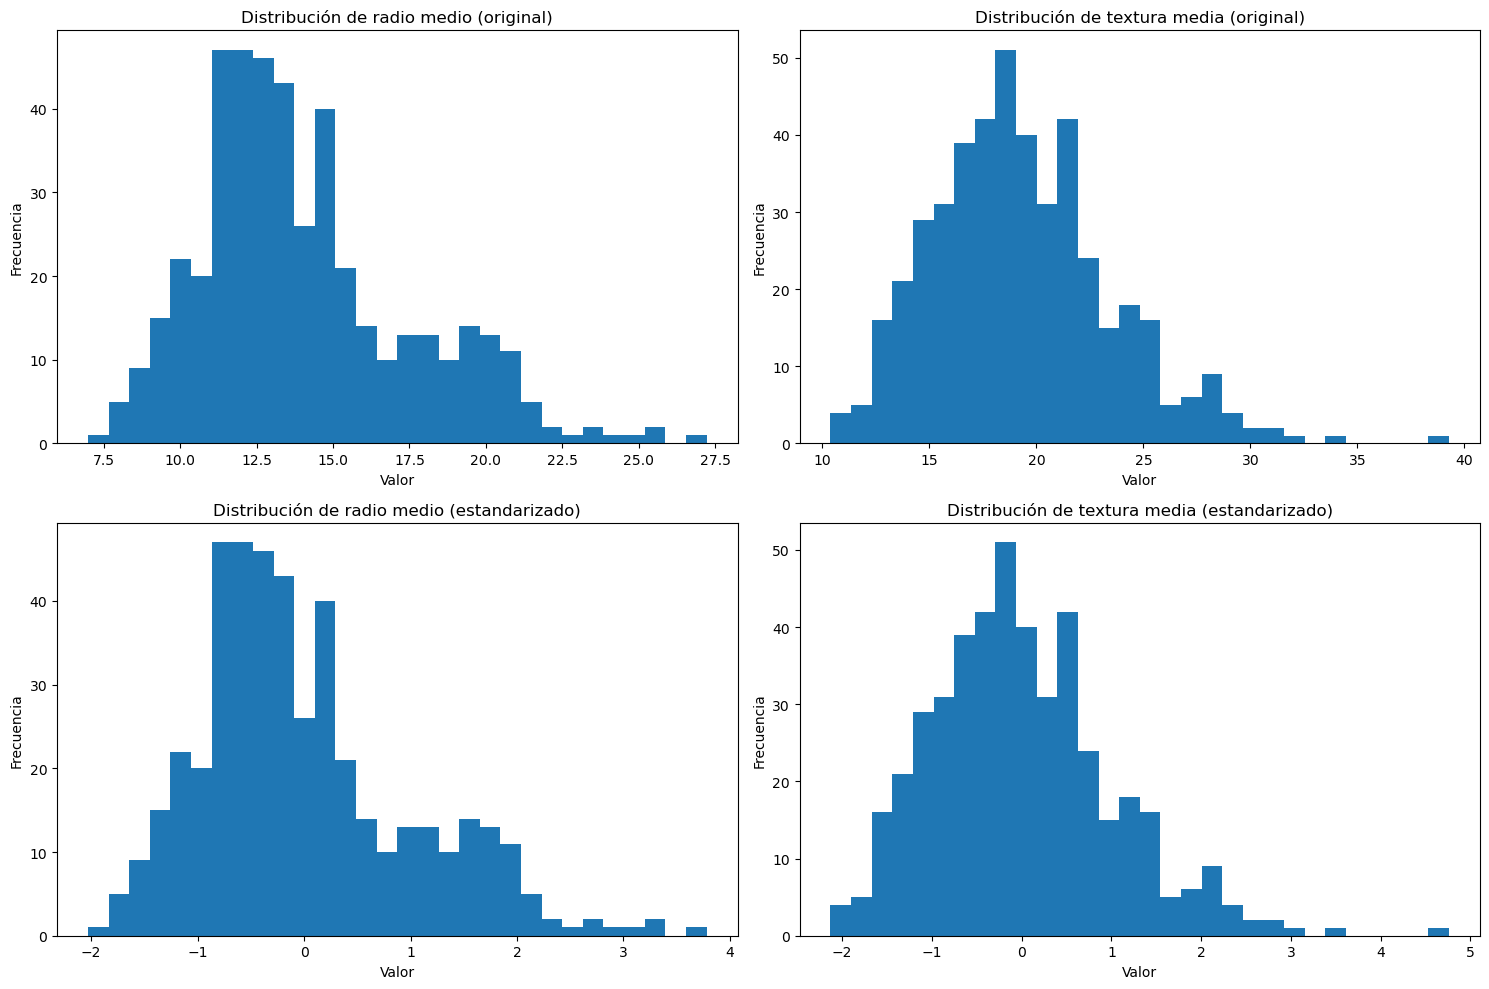

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Antes de la estandarización
axes[0,0].hist(X_train['feat01'], bins=30)
axes[0,0].set_title('Distribución de radio medio (original)')
axes[0,0].set_xlabel('Valor')
axes[0,0].set_ylabel('Frecuencia')

axes[0,1].hist(X_train['feat02'], bins=30)
axes[0,1].set_title('Distribución de textura media (original)')
axes[0,1].set_xlabel('Valor')
axes[0,1].set_ylabel('Frecuencia')

# Después de la estandarización
axes[1,0].hist(X_train_scaled[:,0], bins=30)
axes[1,0].set_title('Distribución de radio medio (estandarizado)')
axes[1,0].set_xlabel('Valor')
axes[1,0].set_ylabel('Frecuencia')

axes[1,1].hist(X_train_scaled[:,1], bins=30)
axes[1,1].set_title('Distribución de textura media (estandarizado)')
axes[1,1].set_xlabel('Valor')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Comentarios sobre los gráficos
- Los gráficos superiores muestran la distribución de los datos ORIGINALES, mientras que los inferiores muestran los datos ESTANDARIZADOS.
- La forma de las distribuciones se mantiene idéntica entre los gráficos superiores e inferiores, variando únicamente la escala horizontal. Esto comprueba que la estandarización no altera la distribución relativa de los datos.
- Se puede ver que en los datos estandarizados la media es cero y hay datos negativos y positivos.
- Las frecuencias (alturas de barras) son idénticas entre los gráficos superiores e inferiores, ya que la estandarización solo afecta a la escala de los valores, no a su frecuencia de aparición.

## Forma de los datos finales

In [15]:
print("\nForma de los datos finales:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Forma de los datos finales:
X_train_scaled: (455, 30)
X_test_scaled: (114, 30)
y_train: (455,)
y_test: (114,)
